In [127]:
import sys
sys.path.append("../")

import numpy as np
import scipy.special as sp
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from tqdm import *
import matplotlib.pylab as pylab
import matplotlib
from scipy.optimize import minimize

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

from theory.units import *
from theory.spec_calc import PowerSpectra, PowerSpectraPopulations
from theory.astrometry_forecast import Parameter, AstrometryObservation, FisherForecast

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [128]:
from plot_params import params

pylab.rcParams.update(params)
plots_dir = "/Users/smsharma/Dropbox/Projects/LensPowerSpectra/LensPower/Draft/plots/"

save_figs = True

cols_default = plt.rcParams['axes.prop_cycle'].by_key()['color']

/Users/smsharma/anaconda3/lib/python3.7/site-packages/matplotlib/__init__.py:855: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
/Users/smsharma/anaconda3/lib/python3.7/site-packages/matplotlib/__init__.py:846: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  "2.2", name=key, obj_type="rcparam", addendum=addendum)


## Fig. 16: Sensitivities for simplified uniform ("Aristotelian") sphere of compact objects

In [107]:
def cl_pop_gauss_alpha(M0, R0, v, Omega_l, l, Dlmin, Dlmax):
    return 16 * 5.114990543587503e-118*l**2*M0*v**4*Omega_l*(((Dlmax**2/(l**2*R0**2))**1.5*(np.sqrt(np.pi) + 2/(Dlmax*np.exp((l**2*R0**2)/Dlmax**2)*np.sqrt(1/(l**2*R0**2))) - np.sqrt(np.pi)*sp.erf(1/(Dlmax*np.sqrt(1/(l**2*R0**2))))))/Dlmax**3 - ((Dlmin**2/(l**2*R0**2))**1.5*(np.sqrt(np.pi) + 2/(Dlmin*np.exp((l**2*R0**2)/Dlmin**2)*np.sqrt(1/(l**2*R0**2))) - np.sqrt(np.pi)*sp.erf(1/(Dlmin*np.sqrt(1/(l**2*R0**2))))))/Dlmin**3)

def cl_pop_gauss(M0, R0, v, Omega_l, l, Dlmin, Dlmax):
    return (-3.868196132832839e-116*M0*v**2*Omega_l*(sp.erf((l*R0)/Dlmax) - sp.erf((l*R0)/Dlmin)))/(l*R0)


In [108]:
def F_alpha(M_0, R_0, v, Omega_l, l, D_min, D_max, sigma_mu, N_q, f_sky=1):
    Cl = cl_pop_gauss_alpha(M_0, R_0, v, Omega_l, l, D_min, D_max) / (asctorad / Year**2) **2 * 1e12
    Nl = 4 * np.pi * sigma_mu ** 2 / N_q
    return f_sky * (l + 0.5) * (Cl / (Cl + Nl)) ** 2

def F(M_0, R_0, v, Omega_l, l, D_min, D_max, sigma_mu, N_q):
    Cl = cl_pop_gauss(M_0, R_0, v, Omega_l, l, D_min, D_max) / (asctorad / Year) **2 *1e12
    Nl = 4 * np.pi * sigma_mu ** 2 / N_q
    return (l + 0.5) * (Cl / (Cl + Nl)) ** 2

In [137]:
sigma_alpha = 2
Dl_min = 1e-10 * kpc
Dl_max = 1 * kpc
R_0 = 10 * pc
v_l = 1e-3
M_0 = 1e8 * M_s
N_q_alpha = 5e9 * 4 * np.pi


l_ary = np.arange(50, 50000)

M_ary = np.logspace(-4, 9, 20) * M_s

sig = lambda logR, M: np.abs(1.64 * 1 / np.sqrt(np.sum(F_alpha(M, (10 ** logR) * pc, v_l, 1., l_ary, Dl_min, Dl_max, sigma_alpha, N_q_alpha, f_sky=0.05))) - 1.)

R_lim = np.array([minimize(sig, -3, method='Powell', args=[M], bounds=[[-5, 3.]]).x for M in tqdm_notebook(M_ary)])

/Users/smsharma/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


/Users/smsharma/anaconda3/lib/python3.7/site-packages/scipy/optimize/_minimize.py:517: RuntimeWarning: Method Powell cannot handle constraints nor bounds.
  RuntimeWarning)
/Users/smsharma/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/Users/smsharma/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in multiply
  
/Users/smsharma/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in double_scalars
  from ipykernel import kernelapp as app


In [141]:
sigma_alpha = 0.1
Dl_min = 1e-10 * kpc
Dl_max = 1 * kpc
R_0 = 10 * pc
v_l = 1e-3
M_0 = 1e8 * M_s
N_q_alpha = 1e10 * 4 * np.pi

from scipy.optimize import minimize

l_ary = np.arange(50, 50000)

M_ary = np.logspace(-4, 9, 20) * M_s

sig = lambda logR, M: np.abs(1.64 * 1 / np.sqrt(np.sum(F_alpha(M, (10 ** logR) * pc, v_l, 1., l_ary, Dl_min, Dl_max, sigma_alpha, N_q_alpha, f_sky=0.05))) - 1.)

R_wfirst_lim = np.array([minimize(sig, -3, method='Powell', args=[M], bounds=[[-5, 3.]]).x for M in tqdm_notebook(M_ary)])

/Users/smsharma/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


/Users/smsharma/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/Users/smsharma/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in multiply
  
/Users/smsharma/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in double_scalars
  from ipykernel import kernelapp as app


In [143]:
sigma_alpha = 1.
Dl_min = 1e-10 * kpc
Dl_max = 50. * kpc
R_0 = 10. * pc
v_l = 1e-3
M_0 = 1e8 * M_s
N_q_alpha = 1e7 * 4 * np.pi

from scipy.optimize import minimize

l_ary = np.arange(10, 5000)

M_ary = np.logspace(-4, 9, 20) * M_s

sig = lambda logR, M: np.abs(1.64 * 1 / np.sqrt(np.sum(F(M, (10 ** logR) * pc, v_l, 1., l_ary, Dl_min, Dl_max, sigma_alpha, N_q_alpha))) - 1.)

R_ska_lim = np.array([minimize(sig, np.log10(M / M_s) / 3., method='COBYLA', args=M, bounds=[[-4, 4.]]).x for M in tqdm_notebook(M_ary)])

/Users/smsharma/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


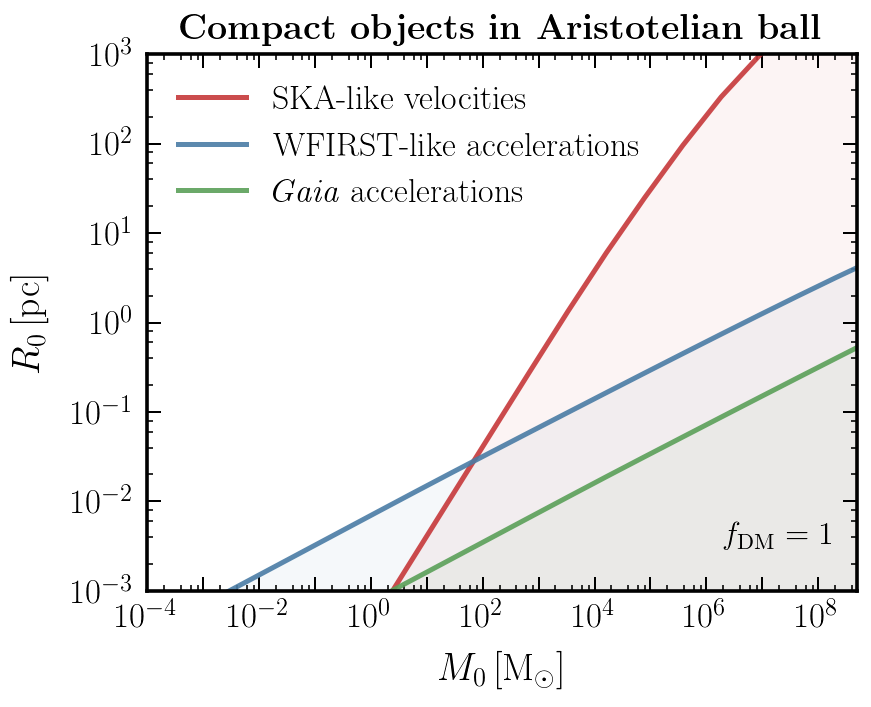

In [148]:
fig, ax = plt.subplots()

plt.plot(np.array(M_ary) / M_s, 10 ** R_ska_lim, label='SKA-like velocities')
plt.fill_between(np.array(M_ary) / M_s, 10 ** R_ska_lim, 1e-3 * np.ones_like(R_ska_lim), color=cols_default[0], alpha=0.05)

plt.plot(np.array(M_ary) / M_s, 10 ** R_wfirst_lim, label='WFIRST-like accelerations')
plt.fill_between(np.array(M_ary) / M_s, 10 ** R_wfirst_lim, 1e-3 * np.ones_like(R_ska_lim), color=cols_default[1], alpha=0.05)

plt.plot(np.array(M_ary) / M_s, 10 ** R_lim, label=r'\emph{Gaia} accelerations')
plt.fill_between(np.array(M_ary) / M_s, 10 ** R_lim, 1e-3 * np.ones_like(R_ska_lim), color=cols_default[2], alpha=0.05)

plt.xscale("log")
plt.yscale("log")

plt.ylim(1e-3, 1e3)
plt.xlim(1e-4, 5e8)

plt.xlabel("$M_0$\,[M$_\odot$]")
plt.ylabel("$R_0$\,[pc]")

plt.title('\\textbf{Compact objects in Aristotelian ball}', y = 1.0, fontsize=18)

plt.tight_layout()
plt.text(2e6, 3e-3, "$f_\mathrm{DM} = 1$", fontsize=16)

# Tick tweaks 

locmaj = matplotlib.ticker.LogLocator(base=10,numticks=12) 
ax.xaxis.set_major_locator(locmaj)

locmin = matplotlib.ticker.LogLocator(base=10.0,subs=(0.2,0.4,0.6,0.8),numticks=12)
ax.xaxis.set_minor_locator(locmin)
ax.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())

locmaj = matplotlib.ticker.LogLocator(base=10,numticks=12) 
ax.yaxis.set_major_locator(locmaj)

locmin = matplotlib.ticker.LogLocator(base=10.0,subs=(0.2,0.4,0.6,0.8),numticks=12)
ax.yaxis.set_minor_locator(locmin)
ax.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())

every_nth = 2
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    if n % every_nth != 1:
        label.set_visible(False)

plt.legend()

plt.tight_layout()
plt.savefig(plots_dir + "compact_M_vs_R_aristotelian.pdf")